# Import package

In [1]:
import os
from tqdm import tqdm

# Madgraph

In [30]:
def gen_i(i, jettype='QCD', MY1=1500, dirc = '/home/james/LHE_test/', fname = 'test', outputpath = '/home/james/LHE_test/data'):
    ##This code is save N times process_setting in different txt file. And then we can use these file as Madgraph input
    # dirc is direction to save your setting txt
    # outputpath is direction you want to output your Madgraph outputs
    #    my outputpath is like /home/james/lHE_test/data/QCD/ or /home/james/lHE_test/data/SVJ/
    
    # fname is setting_txt_file's name
    # MY1 is Z' mass
    
    fname = fname + str(i) +'.txt'
    if jettype == 'QCD':
        jetdef = 'g u d s u~ d~ s~'
        outputpath = outputpath+'/QCD/'
        dirc = dirc + 'QCD/'
    if jettype == 'SVJ':
#         jetdef = 'xd xd~ '
        outputpath = outputpath+'/SVJ/'
        dirc = dirc +'SVJ/'
    nevent = 20000
    jetpt = [250,False] #jet pt range in [250, inf] GeV
    ECM = 14000 # Central mass energy GeV
    
    f = open(dirc+fname, 'w')
    if jettype == 'SVJ':
        f.write('import model DMsimp_s_spin1 \n')
        f.write('generate p p > xd xd~  \n')
        
    if jettype == 'QCD':
        f.write('define j = '+jetdef+' \n')
        f.write('generate p p > j j  \n')
        
    
    f.write('output '+outputpath+str(i)+' \n')
    f.write(' \n')
    f.write('launch '+outputpath+str(i)+' \n')
    f.write('set iseed '+str((i+1)*1000)+' \n')
    f.write('set nevents '+str(nevent)+' \n')
    if jettype == 'SVJ':
        f.write('set pt_min_pdg {5000521: '+str(jetpt[0])+ '} \n')
        
    if jettype == 'QCD':
        f.write('set ptj '+str(jetpt[0])+' \n')

    if (jetpt[1]):
        if jettype == 'SVJ':
            f.write('set pt_max_pdg {5000521: '+str(jetpt[1])+ '} \n')
            
        if jettype == 'QCD':
            f.write('set ptjmax '+str(jetpt[1])+' \n')
    f.write('set run_card ebeam1 '+str(ECM/2)+' \n')
    f.write('set run_card ebeam2 '+str(ECM/2)+ '\n')
    
    if jettype == 'SVJ':
        f.write('set MY1 '+str(MY1)+'\n')
        f.write('set gcxd 1.000000e+00 \n')
        f.write('set gvd11 1.000000e-01 \n')
        f.write('set gvu11 1.000000e-01 \n')
        f.write('set gvd22 1.000000e-01 \n')
        f.write('set gvu22 1.000000e-01 \n')
        f.write('set gvd33 1.000000e-01 \n')
        f.write('set gvu33 1.000000e-01 \n')
    # f.write(' \n')
    
    f.close()
    
def check_txt(i, jettype='QCD', dirc = '/home/james/LHE_test/', fname = 'test'):
    fname = fname + str(i) +'.txt'
    if jettype == 'QCD':
        dirc = dirc + 'QCD/'
    if jettype == 'SVJ':
        dirc = dirc +'SVJ/'
    f = open(dirc+fname, 'r')
    print(f.read())
    f.close()

## Prepare setting txt file

In [31]:
#Prepare setting txt file for parallel
for i in range(20):
    gen_i(i, jettype='SVJ', MY1=1500, dirc = '/home/james/LHE_test/', fname = 'test', outputpath = '/home/james/LHE_test/data')
    gen_i(i, jettype='QCD', dirc = '/home/james/LHE_test/', fname = 'test', outputpath = '/home/james/LHE_test/data')


## Check txt file

In [19]:
check_txt(0, jettype='SVJ', dirc = '/home/james/LHE_test/', fname = 'test')

import model DMsimp_s_spin1 
generate p p > xd xd~  
output /home/james/LHE_test/data/SVJ/0 
 
launch /home/james/LHE_test/data/SVJ/0 
set iseed 1000 
set nevents 20000 
set pt_min_pdg {5000521: 250} 
set run_card ebeam1 7000.0 
set run_card ebeam2 7000.0
set MY1 1500
set gcxd 1.000000e+00 
set gvd11 1.000000e-01 
set gvu11 1.000000e-01 
set gvd22 1.000000e-01 
set gvu22 1.000000e-01 
set gvd33 1.000000e-01 
set gvu33 1.000000e-01 



## Generate (20k + 20k)*N events (Parton level)

In [32]:
# generate (20k + 20k)*N events please use command windows "$ top" to check whether it finishes the job
dirc = '/home/james/LHE_test/'
fname = 'test'
madgraph_bin = "/root/MG5_aMC_v2_7_2/bin/mg5_aMC" # type where your mg5_aMC is
for i in range(20):
    fnamei = fname + str(i) +'.txt'
    dirci = dirc + 'QCD/'
    os.system("nohup "+madgraph_bin +" "+ dirci+ fnamei + " > " + dirci+ fname+str(i)+".log 2>&1 &")
    
    dirci = dirc + 'SVJ/'
#     os.system("nohup /root/MG5_aMC_v2_7_2/bin/mg5_aMC" +" "+ dirci+ fnamei + " > " + dirci+ fname+str(i)+".log 2>&1 &")
    os.system("nohup "+madgraph_bin +" "+ dirci+ fnamei + " > " + dirci+ fname+str(i)+".log 2>&1 &")



## Extract .gz file and change xd pdg_id to 4900101 (before you do this please check the above part is done)

In [33]:
#NOTE YOU NEED TO CHECK whether you finish the previous jobs
# change xd pdg_id to 4900101
output = '/home/james/LHE_test/data/'
fname = 'unweighted_events.lhe'
fnamei = fname +'.gz'
for i in tqdm(range(20)):
    outputi = output + 'QCD/'+str(i)+'/Events/run_01/'
#     os.system("gzip -d "+outputi +" "+ outputi+ fnamei)
    os.system("gzip -d "+ outputi+ fnamei)
    
    os.system("sed -s -i 's/5000521/4900101/g' "+outputi+ fname)

    outputi = output + 'SVJ/'+str(i)+'/Events/run_01/'
    os.system("gzip -d "+ outputi+ fnamei)
    os.system("sed -s -i 's/5000521/4900101/g' "+outputi+ fname)


100%|██████████| 20/20 [04:20<00:00, 13.04s/it]


## Clean up LHE file output path

In [34]:
out_path = '/home/james/LHE_test/data/LHE/'
os.system("rm "+out_path+"QCD/*")
os.system("rm "+out_path+"SVJ/*")

0

## Move all LHE file to certain directory

In [35]:
# Move/Copy LHE file to same directory
output = '/home/james/LHE_test/data/'
fname = 'unweighted_events.lhe'
save_dir =  '/home/james/LHE_test/data/LHE/'
for i in tqdm(range(20)):
    fnamei = fname 
    outputi = output + 'QCD/'+str(i)+'/Events/run_01/'
    save_diri = save_dir + 'QCD/'
    os.system("cp "+outputi + fnamei +" "+ save_diri+ str(i)+".lhe" )

    outputi = output + 'SVJ/'+str(i)+'/Events/run_01/'
    save_diri = save_dir + 'SVJ/'
    os.system("cp "+outputi + fnamei +" "+ save_diri+ str(i)+".lhe" )

100%|██████████| 20/20 [00:04<00:00,  4.31it/s]


# DelphesPythia

In [4]:
def gencmnd_i(i, nevent = 20000, mass = 20, rinv = 0.3, lambdas = 1, dirc = '/home/james/LHE_test/Delphes_cmnd/', fname = 'test',
              inputpath = '/home/james/LHE_test/data/LHE/QCD/'):
    ##This code is save N times process_setting in different txt file. And then we can use these file as Madgraph input
    # dirc is direction to save your setting txt
    # outputpath is direction you want to output your Madgraph outputs
    #    my outputpath is like /home/james/lHE_test/data/QCD/ or /home/james/lHE_test/data/SVJ/
    
    # fname is setting_txt_file's name
    # MY1 is Z' mass
    
    fname = fname + str(i) +'.cmnd'
    
#     nevent = 20000 # N events you want
#     ECM = 14000 # Central mass energy GeV
#     lamdas = 1 # lamda_d
#     rinv = 0.3 # invisible rate
#     mass = 20 # unstable dark meson mass
    # lambdas = mass/2 
#     xqcut = 100 ##in 1707.05632 default in Madgraph
#     Qcut = max(1.4 * xqcut, xqcut+10) #setting in Pythia8
#     nj = 2 #
    n=6 # number of Decimal places you want
    f = open(dirc+fname, 'w')
#--------------------------------------------------------------- Settings used in the main program.
    f.write('Main:numberOfEvents = '+str(nevent)+' \n') # Number of events
    f.write('Main:timesAllowErrors = 3 \n') # 
#---------------------------------------------------------------- Settings related to output in init(), next() and stat()      
    f.write('Init:showChangedSettings = on  \n')
    f.write('Init:showChangedParticleData = off \n')
    f.write('Random:seed = '+str((i+1)*100)+'\n') #change random seed
    f.write('Next:numberCount = 1000 \n') # print the progress per 1000 events
    f.write('Next:numberShowInfo = 1 \n') 
    f.write('Next:numberShowProcess = 1 \n')
    f.write('Next:numberShowEvent = 0 \n')
#-------------------------------------------------------------- Hidden Valley
    f.write('HiddenValley:Ngauge =2 \n') # Number of gauge
#     f.write('HiddenValley:nFlav =2 \n') # Number of flavor
    f.write('HiddenValley:alphaOrder =0 \n') # alphaOrder  0 for fixed alpha_d , 1 for running alpha_d optain by other variables
    f.write('HiddenValley:Lambda =' +str(lambdas)+'\n') # lamda_d
    f.write('HiddenValley:alphaFSR =' +str(lambdas)+' \n') 
    f.write('HiddenValley:spinFv = 0 \n')
    f.write('HiddenValley:FSR = on \n')
    f.write('HiddenValley:fragment = on \n')
    f.write('HiddenValley:pTminFSR = '+ str(1.1 * lambdas)+ '\n')
#------------------------------------------------------------------------------ Dark Particle setting
    f.write('4900101:m0 = '+str(mass / 2) +'\n')
    f.write('4900101:mWidth = '+ str(mass / 100)+ '\n')
    f.write('4900101:mMin = '+str(mass / 2 - mass / 100)+'\n')
    f.write('4900101:mMax = '+str(mass / 2 + mass / 100)+'\n')
    f.write('4900111:m0 = '+str(mass)+'\n')
    f.write('4900113:m0 = '+ str(mass)+'\n')
    f.write('4900211:m0 = '+ str(mass / 2.0 - 0.01)+'\n')
    f.write('4900213:m0 = '+ str(mass / 2.0 - 0.01)+'\n')
    f.write('4900111:onechannel = 1 ' +str(1.0 - rinv) +' 91 -3 3 \n')
    f.write('4900111:addchannel = 1 ' +str(rinv) +' 0 4900211 -4900211 \n')
    f.write('4900113:onechannel = 1 ' +str(round((1 - rinv) / 5.,n)) +' 91 -1 1 \n')
    f.write('4900113:onechannel = 1 ' +str(round((1 - rinv) / 5.,n)) +' 91 -2 2 \n')
    f.write('4900113:onechannel = 1 ' +str(round((1 - rinv) / 5.,n)) +' 91 -3 3 \n')
    f.write('4900113:onechannel = 1 ' +str(round((1 - rinv) / 5.,n)) +' 91 -4 4 \n')
    f.write('4900113:onechannel = 1 ' +str(round((1 - rinv) / 5.,n)) +' 91 -5 5 \n')
    f.write('4900113:addchannel = 1 ' +str(rinv) +' 0 4900213 -4900213 \n')
    f.write('HiddenValley:probVector = '+str(0.75)+ '\n')
            
#-------------------------------------------------------------   ignore these particle 
    f.write('4900001:m0 = 50000 \n')
    f.write('4900002:m0 = 50000 \n')
    f.write('4900003:m0 = 50000 \n')
    f.write('4900004:m0 = 50000 \n')
    f.write('4900005:m0 = 50000 \n')
    f.write('4900006:m0 = 50000 \n')
    f.write('4900011:m0 = 50000 \n')
    f.write('4900012:m0 = 50000 \n')
    f.write('4900013:m0 = 50000 \n')
    f.write('4900014:m0 = 50000 \n')
    f.write('4900015:m0 = 50000 \n')
    f.write('4900016:m0 = 50000 \n')
#------------------------------------------------------------------- input LHE file
    f.write('Beams:frameType = 4 \n')
    f.write('Beams:LHEF = '+inputpath+str(i)+'.lhe'+' \n') # where your LHE file is
    # f.write(' \n')
    
    f.close()
    
def check_cmnd(i, dirc = '/home/james/LHE_test/Delphes_cmnd/', fname = 'test'):
    fname = fname + str(i) +'.cmnd'
    f = open(dirc+fname, 'r')
    print(f.read())
    f.close()

## Prepare DelphesPythia8 cmnd file 

In [5]:
for i in tqdm(range(20)):
    inputpath = '/home/james/LHE_test/data/LHE/QCD/'
    dirc = '/home/james/LHE_test/Delphes_cmnd/QCD/'
    gencmnd_i(i, nevent = 20000, mass = 20, rinv = 0.3, lambdas = 1, dirc = dirc, fname = 'test',
              inputpath = inputpath)
    
    inputpath = '/home/james/LHE_test/data/LHE/SVJ/'
    dirc = '/home/james/LHE_test/Delphes_cmnd/SVJ/'
    gencmnd_i(i, nevent = 20000, mass = 20, rinv = 0.3, lambdas = 1, dirc = dirc, fname = 'test',
              inputpath = inputpath)
    

100%|██████████| 20/20 [00:00<00:00, 2324.29it/s]


## Check cmnd file

In [6]:
check_cmnd(0, dirc = dirc)

Main:numberOfEvents = 20000 
Main:timesAllowErrors = 3 
Init:showChangedSettings = on  
Init:showChangedParticleData = off 
Random:seed = 100
Next:numberCount = 1000 
Next:numberShowInfo = 1 
Next:numberShowProcess = 1 
Next:numberShowEvent = 0 
HiddenValley:Ngauge =2 
HiddenValley:alphaOrder =0 
HiddenValley:Lambda =1
HiddenValley:alphaFSR =1 
HiddenValley:spinFv = 0 
HiddenValley:FSR = on 
HiddenValley:fragment = on 
HiddenValley:pTminFSR = 1.1
4900101:m0 = 10.0
4900101:mWidth = 0.2
4900101:mMin = 9.8
4900101:mMax = 10.2
4900111:m0 = 20
4900113:m0 = 20
4900211:m0 = 9.99
4900213:m0 = 9.99
4900111:onechannel = 1 0.7 91 -3 3 
4900111:addchannel = 1 0.3 0 4900211 -4900211 
4900113:onechannel = 1 0.14 91 -1 1 
4900113:onechannel = 1 0.14 91 -2 2 
4900113:onechannel = 1 0.14 91 -3 3 
4900113:onechannel = 1 0.14 91 -4 4 
4900113:onechannel = 1 0.14 91 -5 5 
4900113:addchannel = 1 0.3 0 4900213 -4900213 
HiddenValley:probVector = 0.75
4900001:m0 = 50000 
4900002:m0 = 50000 
4900003:m0 = 5000

In [7]:
check_cmnd(19, dirc = '/home/james/LHE_test/Delphes_cmnd/QCD/')

Main:numberOfEvents = 20000 
Main:timesAllowErrors = 3 
Init:showChangedSettings = on  
Init:showChangedParticleData = off 
Random:seed = 2000
Next:numberCount = 1000 
Next:numberShowInfo = 1 
Next:numberShowProcess = 1 
Next:numberShowEvent = 0 
HiddenValley:Ngauge =2 
HiddenValley:alphaOrder =0 
HiddenValley:Lambda =1
HiddenValley:alphaFSR =1 
HiddenValley:spinFv = 0 
HiddenValley:FSR = on 
HiddenValley:fragment = on 
HiddenValley:pTminFSR = 1.1
4900101:m0 = 10.0
4900101:mWidth = 0.2
4900101:mMin = 9.8
4900101:mMax = 10.2
4900111:m0 = 20
4900113:m0 = 20
4900211:m0 = 9.99
4900213:m0 = 9.99
4900111:onechannel = 1 0.7 91 -3 3 
4900111:addchannel = 1 0.3 0 4900211 -4900211 
4900113:onechannel = 1 0.14 91 -1 1 
4900113:onechannel = 1 0.14 91 -2 2 
4900113:onechannel = 1 0.14 91 -3 3 
4900113:onechannel = 1 0.14 91 -4 4 
4900113:onechannel = 1 0.14 91 -5 5 
4900113:addchannel = 1 0.3 0 4900213 -4900213 
HiddenValley:probVector = 0.75
4900001:m0 = 50000 
4900002:m0 = 50000 
4900003:m0 = 500

## Clean up all the file in your .root output path

In [26]:
out_path = '/home/james/LHE_test/ROOT/'
os.system("rm -r "+out_path+"QCD/*")
os.system("rm -r "+out_path+"SVJ/*")

0

## Generate (20k + 20k)*N events (Showering + Detector simulation)

In [27]:
# generate (20k + 20k)*N events please use command windows "$ top" to check whether it finishes the job
dirc = '/home/james/LHE_test/Delphes_cmnd/' # Pythia cmnd path
# tlc_file = '/home/james/Delphes-3.4.2/cards/delphes_card_ATLAS_jpt200.tcl' # Delphes .tcl card path
tlc_file = '/home/james/Delphes-3.4.2/cards/delphes_card_CMS_SVJ.tcl' # CMS .tcl card path
out_path = '/home/james/LHE_test/ROOT/' #root file output path
fname = 'test'
DelphesPythia8 = "/home/james/Delphes-3.4.2/DelphesPythia8" # type where your DelphesPythia8 is

for i in range(20):
    fnamei = fname + str(i) +'.root' #output root file
    cmndi = fname +  str(i) + '.cmnd' #input cmnd file
    dirci = dirc + 'QCD/' # input cmnd path
    outi = out_path + 'QCD/'# output file path
    os.system("nohup "+DelphesPythia8 +" "+ tlc_file + " "+ dirci+ cmndi + " "+outi + fnamei +" > " +outi + fname+str(i)+".log 2>&1 &")
#     time.sleep(0.3)
    dirci = dirc + 'SVJ/' # input cmnd path
    outi = out_path + 'SVJ/'# output file path
    os.system("nohup "+DelphesPythia8 +" "+ tlc_file + " "+ dirci+ cmndi + " "+outi + fnamei +" > " +outi + fname+str(i)+".log 2>&1 &")

In [ ]:
/home/james/Delphes-3.4.2/cards/delphes_card_CMS_SVJ.tcl

In [42]:
 dirci+ cmndi

'/home/james/LHE_test/Delphes_cmnd/SVJ/test19.cmnd'

# Prepare .h5 training data 

## First you need to get H5.py in my github

## Clean up directory

In [7]:
out_path = '/home/james/LHE_test/H5/'
os.system("rm "+out_path+"QCD/*")
os.system("rm "+out_path+"SVJ/*")

0

## Use H5.py to caculate Jim and JSS

In [8]:
# generate (20k + 20k)*N events please use command windows "$ top" to check whether it finishes the job
nevents = 20000
dirc = '/home/james/LHE_test/ROOT/'
outpath = '/home/james/LHE_test/H5/'
fname = 'test'
H5py = "/home/james/LHE_test/H5/H5.py" # H5.py path
for i in range(20):
    dirci = dirc + 'QCD/'
    inputrooti = dirci + fname +str(i) +'.root'
    outpathi = outpath + 'QCD/'+str(i)
    os.system("nohup python3 -u "+H5py +" "+str(nevents)+ " "+inputrooti+ " "+outpathi+ " > " + outpathi+ fname+str(i)+".log 2>&1 &")
    
    dirci = dirc + 'SVJ/'
    inputrooti = dirci + fname +str(i) +'.root'
    outpathi = outpath + 'SVJ/'+str(i)
    os.system("nohup python3 -u "+H5py +" "+str(nevents)+ " "+inputrooti+ " "+outpathi+ " > " + outpathi+ fname+str(i)+".log 2>&1 &")

## Check data

In [9]:
import matplotlib.pyplot as plt
import h5py as h5
import numpy as np

In [10]:
f = h5.File("/home/james/LHE_test/H5/SVJ/0jetim.h5",'r')
f = f['jetim'][()]
f2 = h5.File("/home/james/LHE_test/H5/QCD/0jetim.h5",'r')
f2 = f2['jetim'][()]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


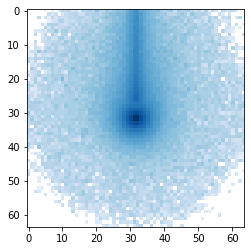

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


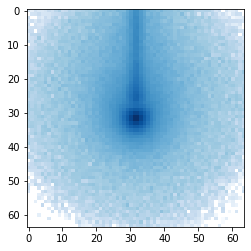

In [11]:
X = np.sum(f2, axis=0)
plt.imshow(np.log(X), cmap='Blues', label = 'QCD')
plt.show()
Y = np.sum(f, axis=0)
plt.imshow(np.log(Y), cmap='Blues', label = 'SVJ')
plt.show()

In [13]:
f = h5.File("/home/james/LHE_test/H5/SVJ/0JSS_Jim.h5",'r')
f = f['Jet_im_my'][()]
f2 = h5.File("/home/james/LHE_test/H5/QCD/0JSS_Jim.h5",'r')
f2 = f2['Jet_im_my'][()]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


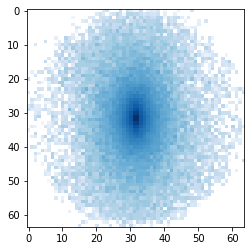

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


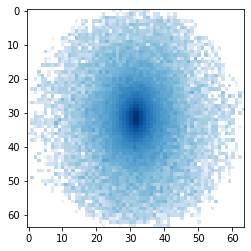

In [14]:
X = np.sum(f2, axis=0)
plt.imshow(np.log(X), cmap='Blues', label = 'QCD')
plt.show()
Y = np.sum(f, axis=0)
plt.imshow(np.log(Y), cmap='Blues', label = 'SVJ')
plt.show()

In [15]:
jss = h5.File("/home/james/LHE_test/H5/SVJ/0JSS_Jim.h5",'r')
jss2 = h5.File("/home/james/LHE_test/H5/QCD/0JSS_Jim.h5",'r')


In [17]:
JSS = []
JSS2 = []
label = ""
for i in range(20):
    jss = h5.File("/home/james/LHE_test/H5/SVJ/"+str(i)+"JSS_Jim.h5",'r')
    jss = jss["MASS"][()].tolist()
    JSS = JSS + jss
    jss2 = h5.File("/home/james/LHE_test/H5/QCD/"+str(i)+"JSS_Jim.h5",'r')
    jss2 = jss2["MASS"][()].tolist()
    JSS2 = JSS2 + jss2
    

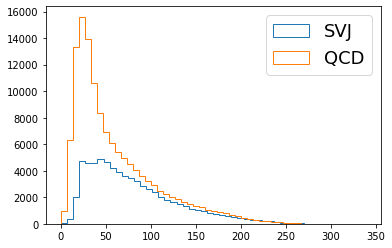

In [19]:
bins = 50
tagsize = 18
plt.hist(JSS ,bins=bins, histtype='step', label='SVJ')
plt.hist(JSS2 ,bins=bins, histtype='step', label='QCD') 
plt.legend(prop={'size': tagsize})
plt.show()

# We need change PT range (SVJ has invisible meson in jet, if we choose pt in (300,400) we did not have enough event) or change pTmin in parton level

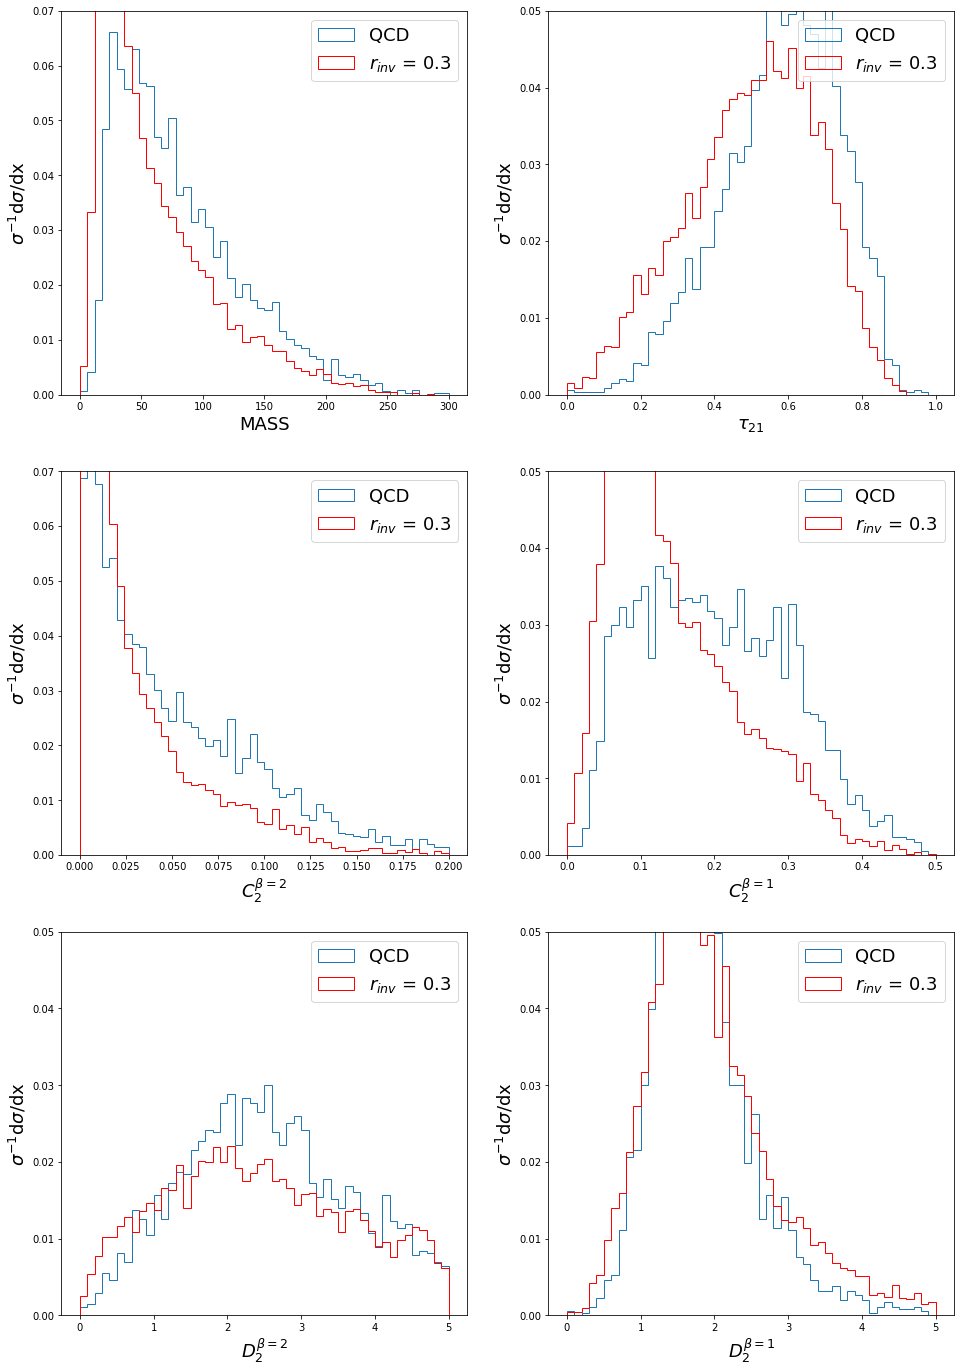

In [20]:
jss = h5.File("/home/james/LHE_test/H5/SVJ/0JSS_Jim.h5",'r')
jss2 = h5.File("/home/james/LHE_test/H5/QCD/0JSS_Jim.h5",'r')

bins = 50
fs=18 # front size
tagsize = 18 # label tag size ((\blue block) W \n (\orange block) QCD )
plt.figure(figsize=(16,24)) # plotsize
x1, x2 = 0, 1
Labels = ['MASS', 'T21', 'C22', 'C21',  'D22', 'D21']

# X_Labels = ['${\u03C4_{1}}$', '${\u03C4_{2}}$', '${\u03C4_{3}}$', '${\u03C4_{21}}$', '${\u03C4_{32}}$',
#             'EE2', 'EE3', 'D2', 'angularity', 'KtDeltaR', 'PT', 'ETA', 'PHI', 'MASS']
X_Labels = {'T21':['${\u03C4_{21}}$'], 'D21':['${D_{2}^{\u03B2=1}}$'], 'MASS':['MASS'], 'D22':['$D_{2}^{\u03B2=2}$'], 'C22':['$C_{2}^{\u03B2=2}$'], 'C21':['$C_{2}^{\u03B2=1}$']}

Range = {'T21':[0,1], 'D21':[0,5], 'MASS':[0,300], 'D22':[0,5], 'C22':[0, 0.2], 'C21':[0, 0.5]}
Ylm = {'MASS':[0,0.07], 'T21':[0, 0.05], 'C22':[0,0.07], 'C21':[0,0.05], 'D22':[0, 0.05], 'D21':[0, 0.05]}
for i in range(6):
    W1 = np.array([1 for j in range(len(jss[Labels[i]]))])
    W1 = W1/sum(W1)
    W2 = np.array([1 for j in range(len(jss2[Labels[i]]))])
    W2 = W2/sum(W2)
    plt.subplot(3,2,i+1)
    plt.hist(jss[Labels[i]][()] ,bins=bins, histtype='step', weights = W1, range=Range[Labels[i]], label='QCD')
    plt.hist(jss2[Labels[i]][()] ,bins=bins, histtype='step', color='r', weights = W2, range=Range[Labels[i]], label='$r_{inv}$ = 0.3')

    plt.legend(prop={'size': tagsize}) # plot label tag
#     plt.yscale('log')
    # plt.xscale('log')
    plt.xlabel(X_Labels[Labels[i]][0] , fontsize=fs)  # plot x-axis label
    plt.ylabel("${\sigma^{-1}}$d${\sigma}$/dx", fontsize=fs)  # plot y-axis label $\u03C3^{-1}$
    plt.ylim(Ylm[Labels[i]])
    # plt.xlim((x1,x2))

# plt.savefig("./JSS_variable_QCD_SVJ.png")  #save figure as png  
plt.show() 